# Data Preparation - Tools

In [1]:
# Importing tools/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1. Numpy**

In [8]:
arr = np.array([0, 1, 2, 5, 10, 2])
type(arr)

numpy.ndarray

**2. Pandas**

In [ ]:
# DataFrame
# Series

In [ ]:
# Reading CSV File

In [9]:
df = pd.read_csv('Poverty-Indicator_Disctrict-Wise.txt', sep=',')

In [12]:
df['Unit']

0        69134
1        69133
2        69132
3        69131
4        69124
         ...  
11715    14022
11716    14021
11717    14013
11718    14012
11719    14011
Name: Unit, Length: 11720, dtype: int64

**3. Matplotlib**

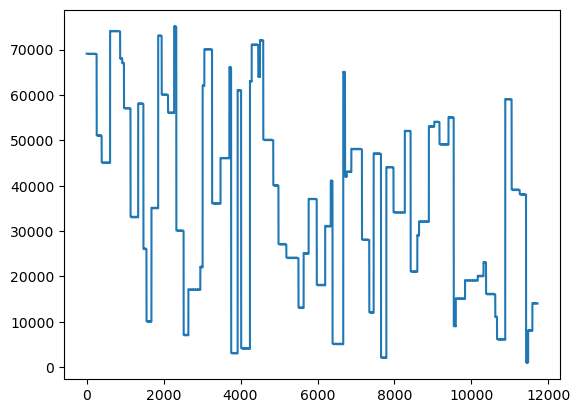

In [13]:
plt.plot(df['Unit'])

### ***** END OF FILE ***********************************